<a href="https://colab.research.google.com/github/DavidCastro88/RawMaterialSegmentation/blob/main/RawMaterialsSegmentatioKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/DavidCastro88/RawMaterialSegmentation/main/RawMaterialsData.csv', sep=';',decimal='.')
data.head()

,ID Material,1,2,3,4,5,6,7,8,9,10,11,12,Total,Costo unitario,# Proveedores,Desv Estand Lead Time Abast. (días)
0,GC-001,13708,13182,19049.0,4936,5493,15817,16733,25614,15930,13758,7523,15491,167234,$ 11.397,5,"15,2"
1,GC-002,9835,24734,17901.0,12097,7371,15065,19971,12427,8463,10219,8383,7260,153726,$ 20.323,3,"10,4"
2,GC-003,18411,8255,6283.0,3933,8810,6647,9119,6763,4336,7723,6160,4041,90481,$ 80.592,8,"8,6"
3,GC-004,15967,26931,22592.0,14521,5937,1406,1621,3616,6772,6100,6477,5969,117909,$ 20.394,5,"7,8"
4,GC-005,6007,7721,3080.0,2128,2003,1621,829,619,3508,5525,12008,7951,53000,$ 75.072,10,"10,4"


In [ ]:
data=data.drop(columns=['1','2','3','4','5','6','7','8','9','10','11','12',],axis=1)
data

,ID Material,Total,Costo unitario,# Proveedores,Desv Estand Lead Time Abast. (días)
0,GC-001,167234,$ 11.397,5,"15,2"
1,GC-002,153726,$ 20.323,3,"10,4"
2,GC-003,90481,$ 80.592,8,"8,6"
3,GC-004,117909,$ 20.394,5,"7,8"
4,GC-005,53000,$ 75.072,10,"10,4"
...,...,...,...,...,...
105,GC-106,6849,$ 98.752,3,"7,4"
106,GC-107,24040,$ 8.302,10,4
107,GC-108,8412,$ 37.096,8,"10,6"
108,GC-109,15014,$ 47.102,7,"9,8"


In [ ]:
data.columns

Index(['ID Material', 'Total', 'Costo unitario', '# Proveedores',
       'Desv Estand Lead Time Abast. (días)'],
      dtype='object')

In [ ]:
data=data.rename(columns={'Total':'Demanda','Desv Estand Lead Time Abast. (días)':'LeadTime'})
data

,ID Material,Demanda,Costo unitario,# Proveedores,LeadTime
0,GC-001,167234,$ 11.397,5,"15,2"
1,GC-002,153726,$ 20.323,3,"10,4"
2,GC-003,90481,$ 80.592,8,"8,6"
3,GC-004,117909,$ 20.394,5,"7,8"
4,GC-005,53000,$ 75.072,10,"10,4"
...,...,...,...,...,...
105,GC-106,6849,$ 98.752,3,"7,4"
106,GC-107,24040,$ 8.302,10,4
107,GC-108,8412,$ 37.096,8,"10,6"
108,GC-109,15014,$ 47.102,7,"9,8"


In [ ]:
data.dtypes

ID Material        object
Demanda             int64
Costo unitario      int64
# Proveedores       int64
LeadTime          float64
dtype: object

In [ ]:
data['Costo unitario'] = pd.to_numeric(data['Costo unitario'].str.replace(r'\D', '', regex=True))
data['LeadTime'] = data['LeadTime'].str.replace(',', '.').astype(float)
data

,ID Material,Demanda,Costo unitario,# Proveedores,LeadTime
0,GC-001,167234,11397,5,15.2
1,GC-002,153726,20323,3,10.4
2,GC-003,90481,80592,8,8.6
3,GC-004,117909,20394,5,7.8
4,GC-005,53000,75072,10,10.4
...,...,...,...,...,...
105,GC-106,6849,98752,3,7.4
106,GC-107,24040,8302,10,4.0
107,GC-108,8412,37096,8,10.6
108,GC-109,15014,47102,7,9.8


## ***Exploratory Data Analysis***

In [ ]:
data.shape

(110, 5)

In [ ]:
data.isnull().sum()

ID Material       0
Demanda           0
Costo unitario    0
# Proveedores     0
LeadTime          0
dtype: int64

In [ ]:
data.describe()

,Demanda,Costo unitario,# Proveedores,LeadTime
count,110.000000,110.000000,110.000000,110.000000
mean,16895.418182,54409.009091,5.545455,8.234545
std,28444.448837,35048.340305,2.853089,3.278270
min,273.000000,2191.000000,1.000000,2.400000
25%,3383.750000,22171.500000,3.250000,5.850000
50%,5941.500000,47087.000000,5.500000,7.600000
75%,17266.000000,85949.500000,7.750000,9.800000
max,167234.000000,118002.000000,11.000000,18.200000


In [ ]:
data=data.rename(columns={'Costo unitario':'CostoUnitario','# Proveedores':'Proveedores'})

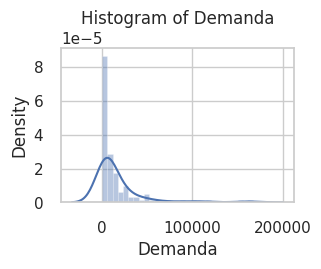

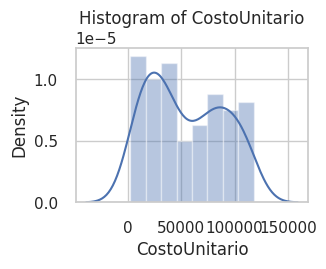

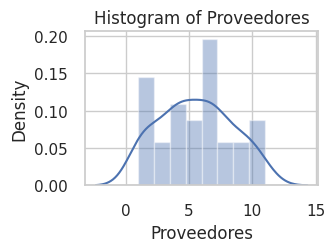

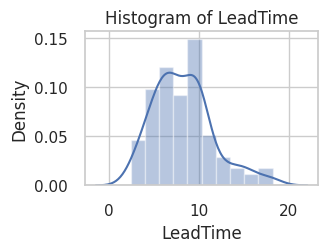

In [ ]:
columns = ['Demanda', 'CostoUnitario', 'Proveedores','LeadTime']

for feature in columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(3, 2))
    sns.histplot(data[feature],
                 kde=True,
                 stat="density",
                 kde_kws=dict(cut=3),
                 alpha=.4,
                 edgecolor=(1, 1, 1, .4))
    plt.title(f'Histogram of {feature}')
    plt.show()

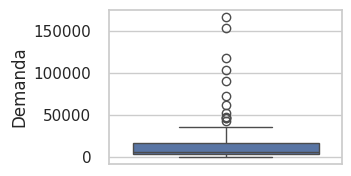

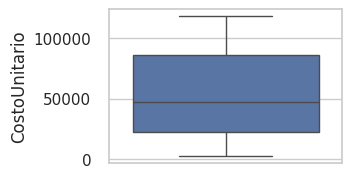

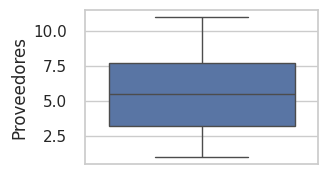

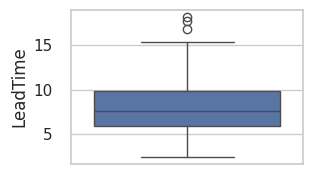

In [ ]:
for feature in columns:
  plt.figure(figsize=(3, 2))
  sns.boxplot(data=data,y=data[feature])

## ***Bivariate Analysis***

<Axes: xlabel='Demanda', ylabel='CostoUnitario'>

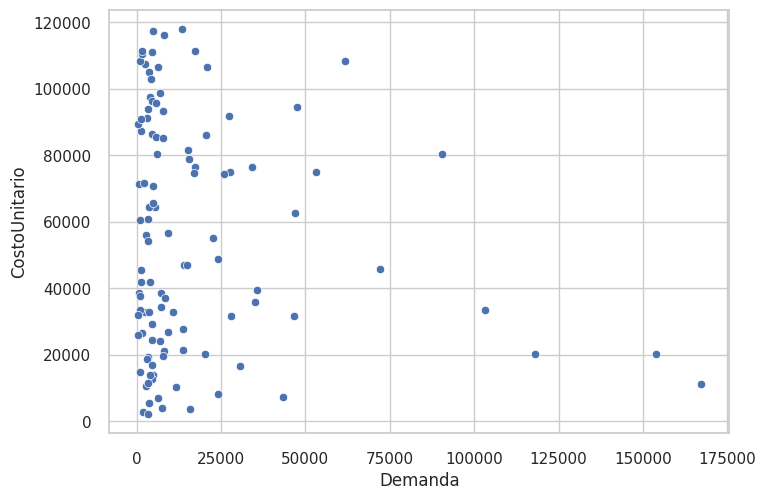

In [ ]:
sns.scatterplot(data=data,x='Demanda',y='CostoUnitario')

<Axes: xlabel='Demanda', ylabel='LeadTime'>

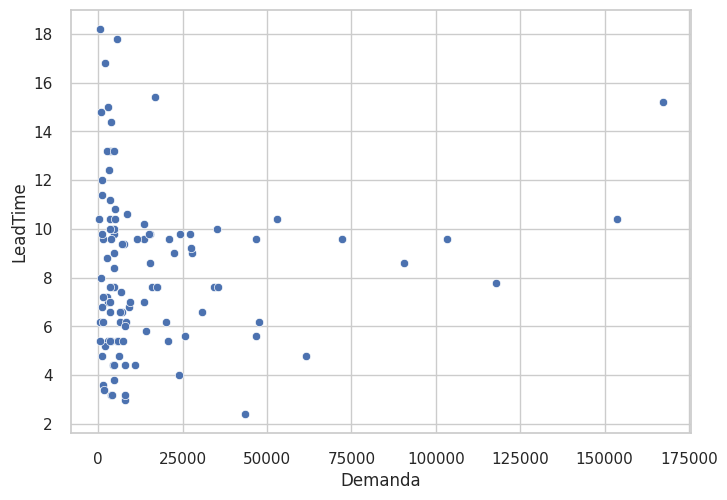

In [ ]:
sns.scatterplot(data=data,x='Demanda',y='LeadTime')

<Axes: xlabel='Demanda', ylabel='Proveedores'>

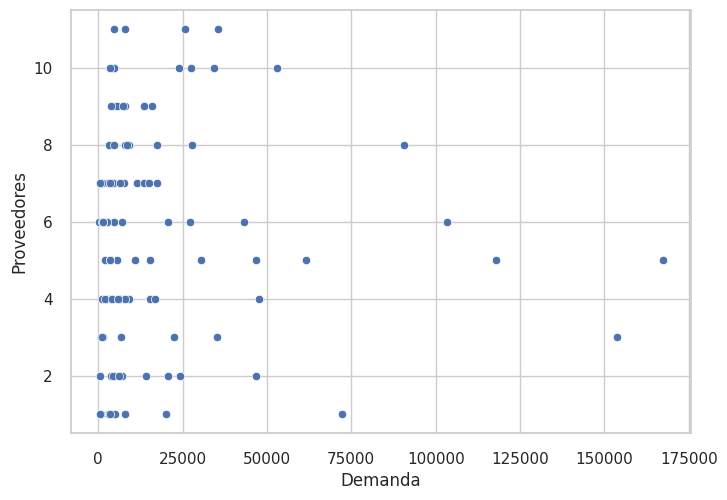

In [ ]:
sns.scatterplot(data=data,x='Demanda',y='Proveedores')

<Axes: xlabel='CostoUnitario', ylabel='LeadTime'>

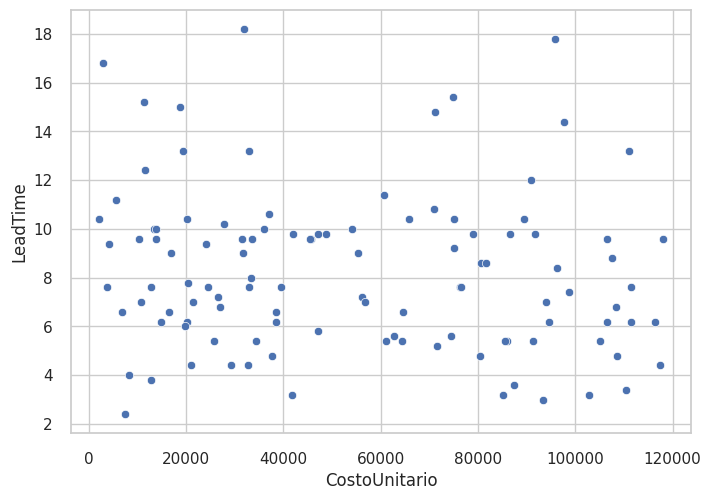

In [ ]:
sns.scatterplot(data=data,x='CostoUnitario',y='LeadTime')

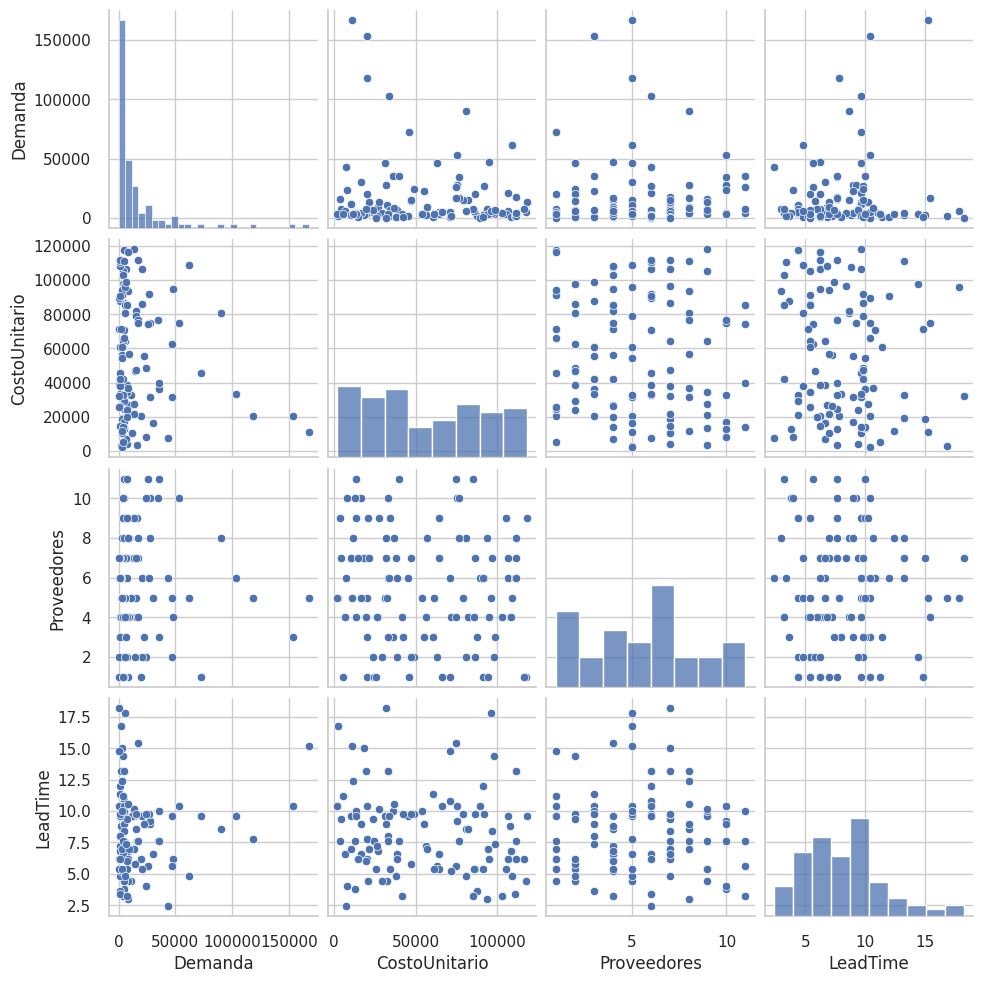

In [49]:
sns.pairplot(data)

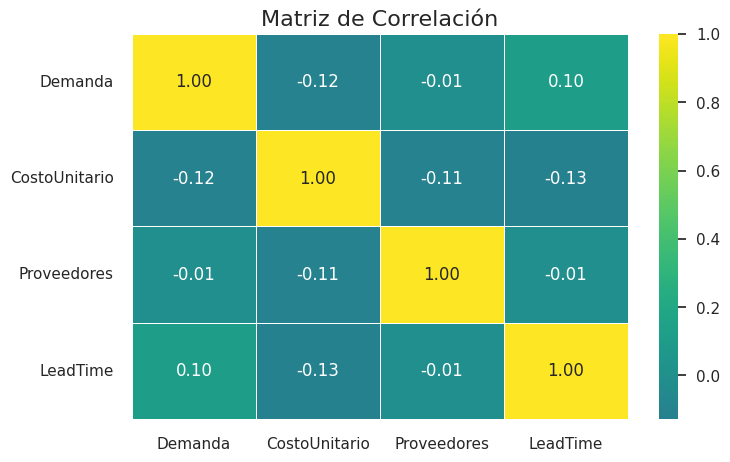

In [50]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

In [52]:
data_cl = data.copy()
data_cl=data_cl[['Demanda', 'CostoUnitario', 'Proveedores', 'LeadTime']]
scaler = StandardScaler()
data_cl[data_cl.columns] = scaler.fit_transform(data_cl[data_cl.columns])
X_train, X_val = train_test_split(data_cl, test_size=0.2, random_state=1983)
X_cl = X_train.copy()
X_clv = X_val.copy()

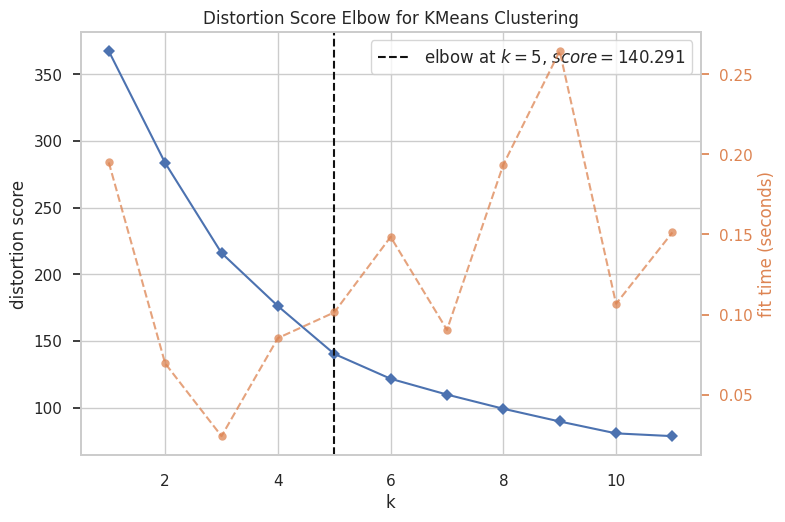

In [53]:
model = KMeans(random_state=88)
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(X_train)
visualizer.show();

In [54]:
def generate_siluet(X_train, n_clusters):
    model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=88)
    cluster_labels = model.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)
    plt.figure(figsize=(9, 5))
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X_train) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title(f"Silhouette analysis for KMeans clustering with {n_clusters} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.text(silhouette_avg + 0.02, 5, f'Average Silhouette Score: {silhouette_avg:.4f}', color="red")
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

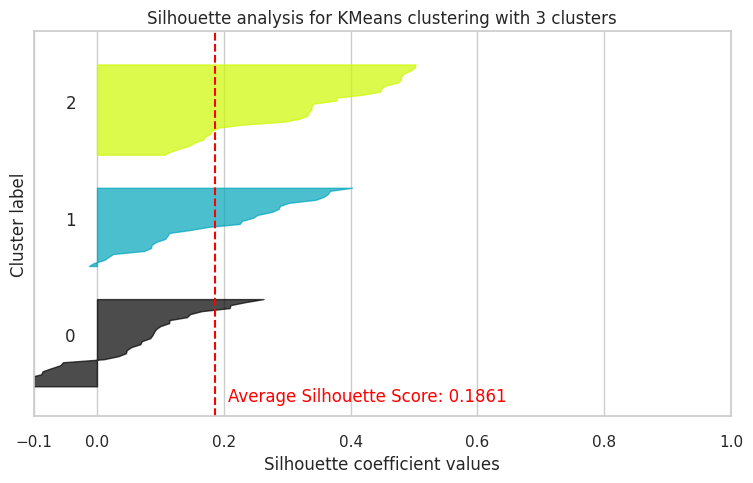

In [55]:
generate_siluet(X_train,3)

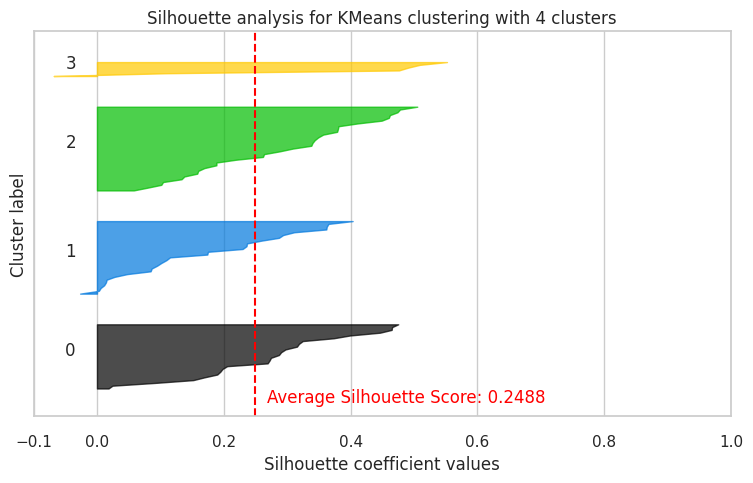

In [56]:
generate_siluet(X_train,4)

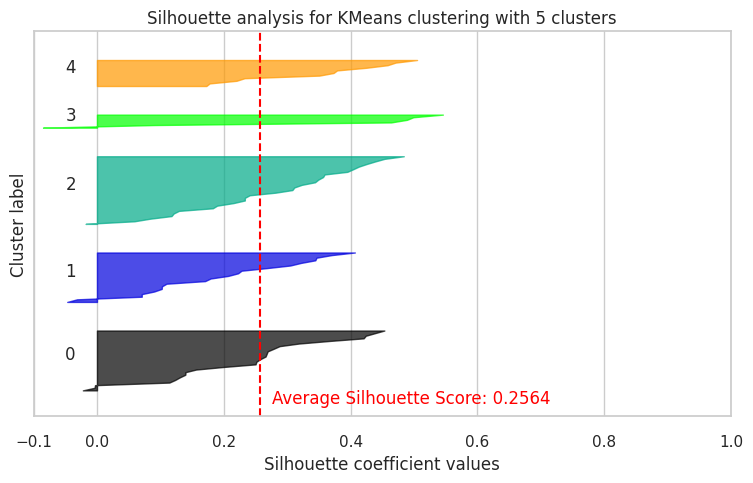

In [57]:
generate_siluet(X_train,5)

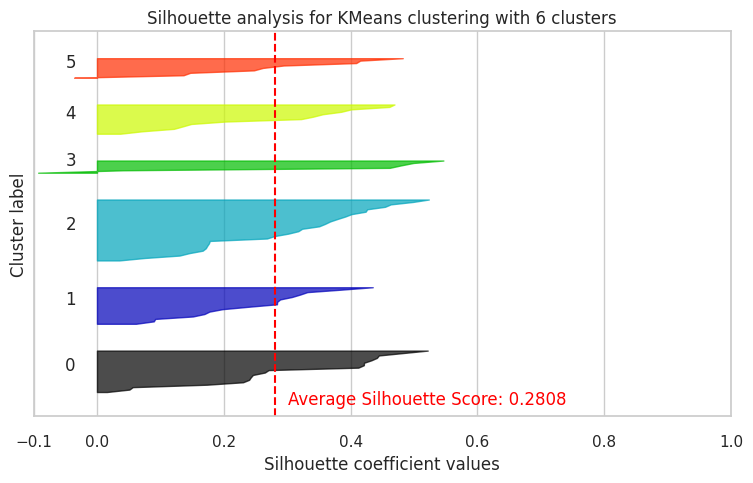

In [58]:
generate_siluet(X_train,6)

In [59]:
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X_train)
  inertia_scores.append(kmeans.inertia_)
inertia_scores

[367.3445110441601,
 283.49130364273356,
 215.78364577518556,
 176.16192013132735,
 140.7394924877637,
 122.21365263217211,
 110.11303875558602,
 100.81343134698774,
 90.50314388341441,
 81.5161629342135]

In [60]:
kmeans_model = KMeans(n_clusters=5,n_init = 'auto', random_state=88)
kmeans_model.fit(X_train)

KMeans(n_clusters=5, n_init='auto', random_state=88)

In [61]:
y_lab = kmeans_model.fit_predict(X_train)
pd.crosstab(y_lab,'Conteo')

col_0,Conteo
row_0,
0,24
1,20
2,27
3,6
4,11


In [62]:
X_cl['Cluster'] = kmeans_model.labels_
X_cl['Cluster'].value_counts()

2    27
0    24
1    20
4    11
3     6
Name: Cluster, dtype: int64

In [63]:
clusters_val=kmeans_model.predict(X_clv)
X_clv['Cluster'] = clusters_val

In [64]:
X_clv['Cluster'].value_counts()

1    7
0    6
4    6
2    3
Name: Cluster, dtype: int64

In [65]:
data_cluster = pd.concat([X_cl, X_clv], ignore_index=False)
data_cluster

,Demanda,CostoUnitario,Proveedores,LeadTime,Cluster
0,5.309529,-1.232836,-0.192055,2.134459,3
52,-0.440843,-0.721696,-1.248360,-1.175039,2
35,-0.430955,-1.173877,1.216350,0.540997,0
101,-0.475560,-0.007596,-0.192055,0.540997,2
12,0.483971,-1.083561,-0.192055,-0.500882,2
...,...,...,...,...,...
53,-0.316527,1.114860,0.864249,-1.604048,4
51,-0.402312,0.287486,1.216350,-0.868604,1
94,-0.471816,-0.613007,1.568452,-0.194447,0
27,0.133378,0.907744,-1.248360,-0.868604,4


In [66]:
data_cluster['Cluster']=data_cluster['Cluster'] + 1
data_cluster['Cluster'].value_counts()

3    30
1    30
2    27
5    17
4     6
Name: Cluster, dtype: int64

In [67]:
data_seg = pd.merge(data, data_cluster[['Cluster']], left_index=True, right_index=True)
data_seg

,ID Material,Demanda,CostoUnitario,Proveedores,LeadTime,Cluster
0,GC-001,167234,11397,5,15.2,4
1,GC-002,153726,20323,3,10.4,4
2,GC-003,90481,80592,8,8.6,4
3,GC-004,117909,20394,5,7.8,4
4,GC-005,53000,75072,10,10.4,2
...,...,...,...,...,...,...
105,GC-106,6849,98752,3,7.4,5
106,GC-107,24040,8302,10,4.0,1
107,GC-108,8412,37096,8,10.6,1
108,GC-109,15014,47102,7,9.8,1


In [69]:
import plotly.express as px
fig = px.scatter_3d(data_seg, x='Demanda', y='CostoUnitario', z='Proveedores',color='Cluster',hover_data={'ID Material': True})
fig.write_html("mi_grafico.html")
fig.show()

In [80]:
import plotly.express as px
fig = px.scatter_3d(data_seg, x='Demanda', y='CostoUnitario', z='LeadTime',color='Cluster',hover_data={'ID Material': True})
fig.write_html("mi_grafico.html")
fig.show()

<Axes: xlabel='Demanda', ylabel='CostoUnitario'>

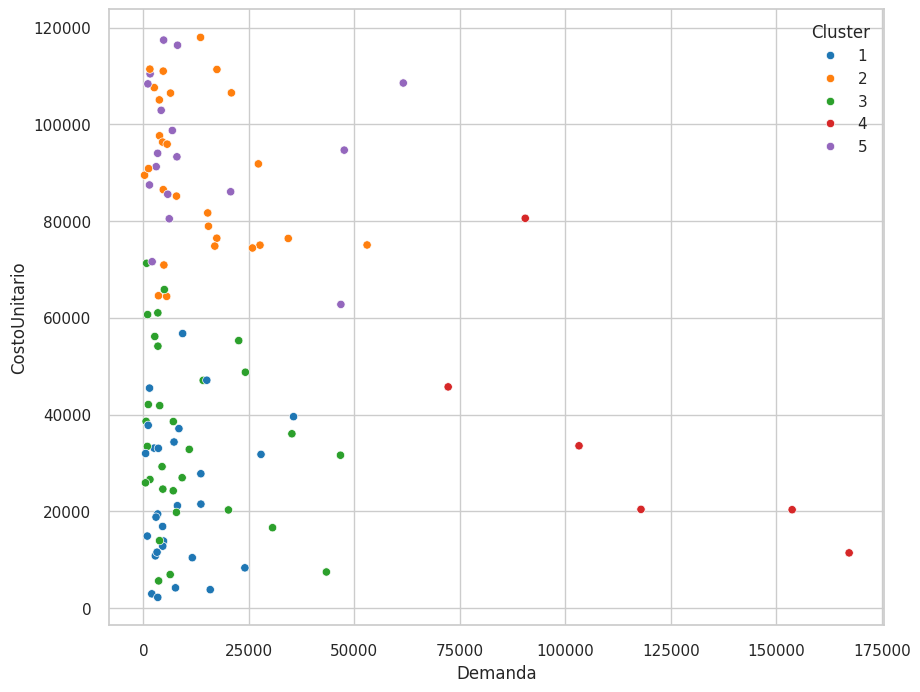

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_seg,x='Demanda',y='CostoUnitario',hue='Cluster',palette='tab10')

<Axes: xlabel='Demanda', ylabel='LeadTime'>

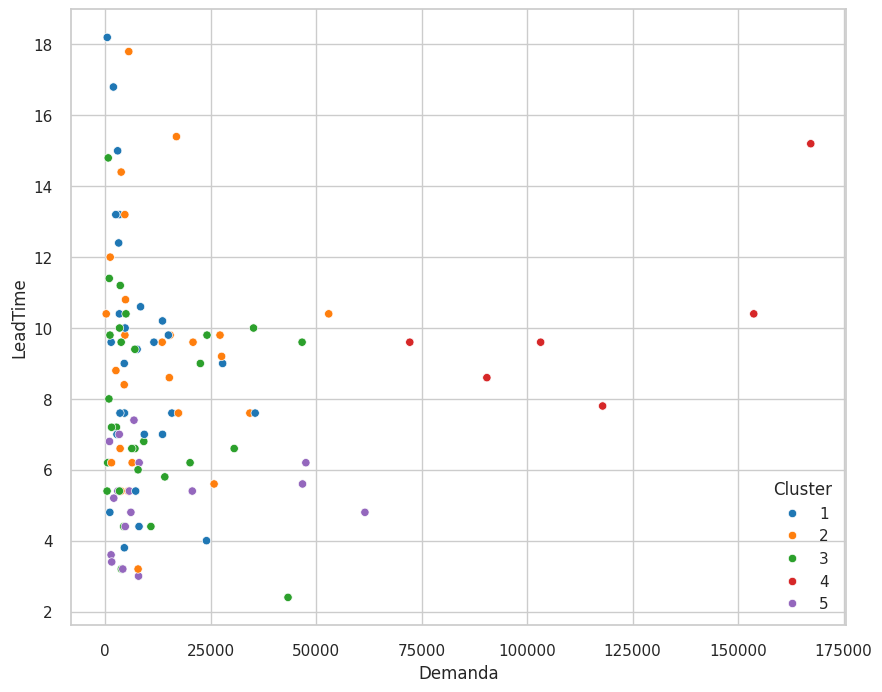

In [73]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_seg,x='Demanda',y='LeadTime',hue='Cluster',palette='tab10')

<Axes: xlabel='CostoUnitario', ylabel='LeadTime'>

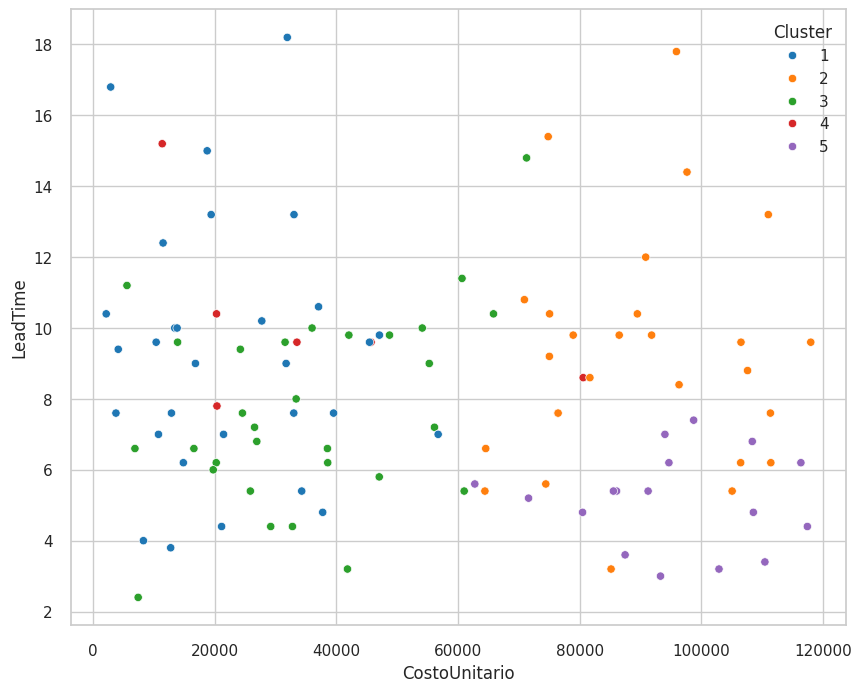

In [74]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_seg,x='CostoUnitario',y='LeadTime',hue='Cluster',palette='tab10')

In [77]:
productos_cluster1 = data_seg['ID Material'][data_seg['Cluster']==1]
productos_cluster2 = data_seg['ID Material'][data_seg['Cluster']==2]
productos_cluster3 = data_seg['ID Material'][data_seg['Cluster']==3]
productos_cluster4 = data_seg['ID Material'][data_seg['Cluster']==4]
productos_cluster5 = data_seg['ID Material'][data_seg['Cluster']==5]

In [79]:
for tipo in range(1,6):
  print(f'Los productos del cluster {tipo} son:')
  productos=list(data_seg['ID Material'][data_seg['Cluster']==tipo])
  print(', '.join(productos))
  print()

Los productos del cluster 1 son:
GC-011, GC-018, GC-022, GC-026, GC-030, GC-033, GC-035, GC-036, GC-037, GC-041, GC-043, GC-044, GC-050, GC-051, GC-059, GC-061, GC-065, GC-067, GC-074, GC-077, GC-087, GC-091, GC-092, GC-095, GC-096, GC-098, GC-103, GC-107, GC-108, GC-109

Los productos del cluster 2 son:
GC-005, GC-009, GC-012, GC-014, GC-016, GC-017, GC-019, GC-023, GC-024, GC-025, GC-027, GC-034, GC-038, GC-042, GC-048, GC-049, GC-052, GC-060, GC-069, GC-071, GC-075, GC-084, GC-089, GC-093, GC-097, GC-101, GC-104

Los productos del cluster 3 son:
GC-007, GC-013, GC-015, GC-020, GC-021, GC-029, GC-031, GC-032, GC-039, GC-040, GC-045, GC-046, GC-047, GC-053, GC-055, GC-056, GC-057, GC-062, GC-068, GC-070, GC-073, GC-076, GC-081, GC-085, GC-088, GC-094, GC-099, GC-100, GC-102, GC-105

Los productos del cluster 4 son:
GC-001, GC-002, GC-003, GC-004, GC-006, GC-083

Los productos del cluster 5 son:
GC-008, GC-010, GC-028, GC-054, GC-058, GC-063, GC-064, GC-066, GC-072, GC-078, GC-079, GC-

## ***Caracteristicas de los clusters:***

Cluster 1.
Productos con demanda baja-media, costo unitario bajo, y con un gran número de proveedores. (30 productos en total).

Cluster 2.
Productos con demanda baja-media, costo unitario alto, y con un gran número de proveedores. (27 productos en total).

Cluster 3.
Productos con demanda baja-media, costo unitario bajo, y con bajo número de proveedores. (30 productos en total).

Cluster 4.
Productos más demandados, costo unitario bajo, y con desviación estandár de lead time medio. (6 productos en total).

Cluster 5.
Productos menos demandados, costo unitario bajo, bajo número de proveedores, y desviación de lead time más bajo. (17 productos en total).

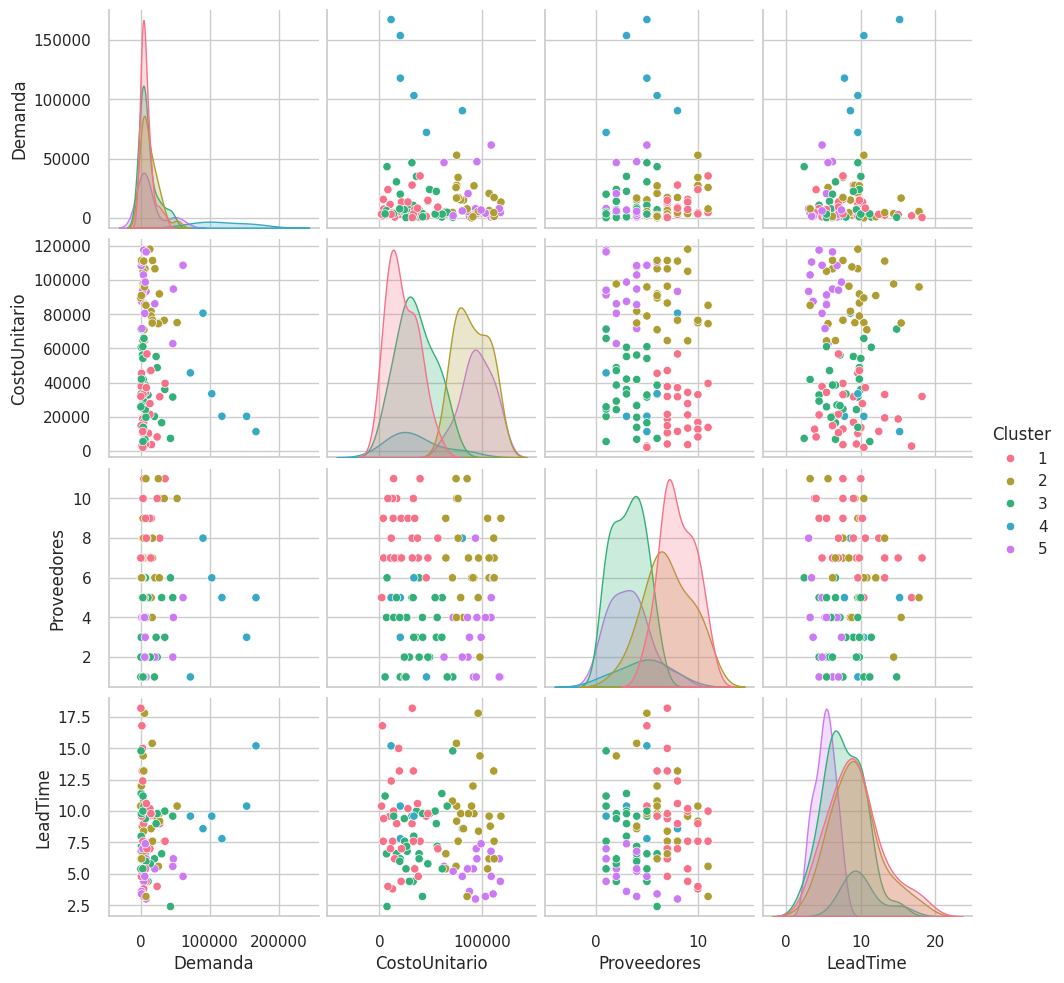

In [81]:
custom_palette = sns.color_palette("husl", n_colors=5)
sns.pairplot(data_seg, hue='Cluster', palette=custom_palette)
plt.show()

In [51]:
data.columns

Index(['ID Material', 'Demanda', 'CostoUnitario', 'Proveedores', 'LeadTime'], dtype='object')